In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [79]:
bowling = pd.read_csv("fact_bowling_summary.csv")
bating= pd.read_csv("fact_bating_summary.csv")
match = pd.read_csv("dim_match_summary.csv")
players=pd.read_csv("dim_players.csv")
df = pd.read_csv("t20-world-cup-22.csv")

## Bowling Summary

In [7]:
bowling

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4.0,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4.0,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4.0,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4.0,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4.0,0,27,1,6.75,8,1,1,0,0,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Pakistan Vs England,Pakistan,Naseem Shah,4.0,0,30,0,7.50,15,3,1,1,0,T20I # 1879
496,Pakistan Vs England,Pakistan,Haris Rauf,4.0,0,23,2,5.75,13,3,0,1,0,T20I # 1879
497,Pakistan Vs England,Pakistan,Shadab Khan,4.0,0,20,1,5.00,10,1,0,0,0,T20I # 1879
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4.0,0,38,1,9.50,5,5,0,2,0,T20I # 1879


In [15]:
bowling.shape

(500, 14)

In [10]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        500 non-null    object 
 1   bowlingTeam  500 non-null    object 
 2   bowlerName   500 non-null    object 
 3   overs        500 non-null    float64
 4   maiden       500 non-null    int64  
 5   runs         500 non-null    int64  
 6   wickets      500 non-null    int64  
 7   economy      500 non-null    float64
 8   0s           500 non-null    int64  
 9   4s           500 non-null    int64  
 10  6s           500 non-null    int64  
 11  wides        500 non-null    int64  
 12  noBalls      500 non-null    int64  
 13  match_id     500 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 54.8+ KB


In [11]:
bowling.isnull().sum()

match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
match_id       0
dtype: int64

In [12]:
bowling.duplicated().sum()

0

In [13]:
# Select only the numeric columns
numeric_bowling = bowling.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_bowl = numeric_bowling.corr()
print(corr_bowl)

            overs    maiden      runs   wickets   economy        0s        4s  \
overs    1.000000  0.097228  0.601666  0.409893 -0.285791  0.729958  0.302398   
maiden   0.097228  1.000000 -0.073875  0.127301 -0.156686  0.245084 -0.013173   
runs     0.601666 -0.073875  1.000000  0.007998  0.516455  0.096597  0.680800   
wickets  0.409893  0.127301  0.007998  1.000000 -0.375393  0.555791 -0.005541   
economy -0.285791 -0.156686  0.516455 -0.375393  1.000000 -0.558017  0.459914   
0s       0.729958  0.245084  0.096597  0.555791 -0.558017  1.000000  0.064141   
4s       0.302398 -0.013173  0.680800 -0.005541  0.459914  0.064141  1.000000   
6s       0.164588 -0.038898  0.594419 -0.046977  0.507341 -0.016436  0.081033   
wides    0.192574 -0.017631  0.277586  0.036776  0.115834  0.197984  0.179226   
noBalls  0.038086  0.013365  0.214817  0.078392  0.198683  0.025676  0.157566   

               6s     wides   noBalls  
overs    0.164588  0.192574  0.038086  
maiden  -0.038898 -0.017631 

### Wickets Distribution

C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


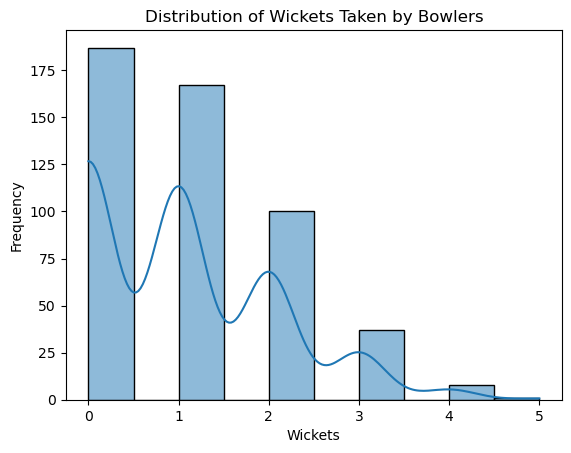

In [31]:
sns.histplot(bowling['wickets'], bins=10, kde=True)
plt.title('Distribution of Wickets Taken by Bowlers')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

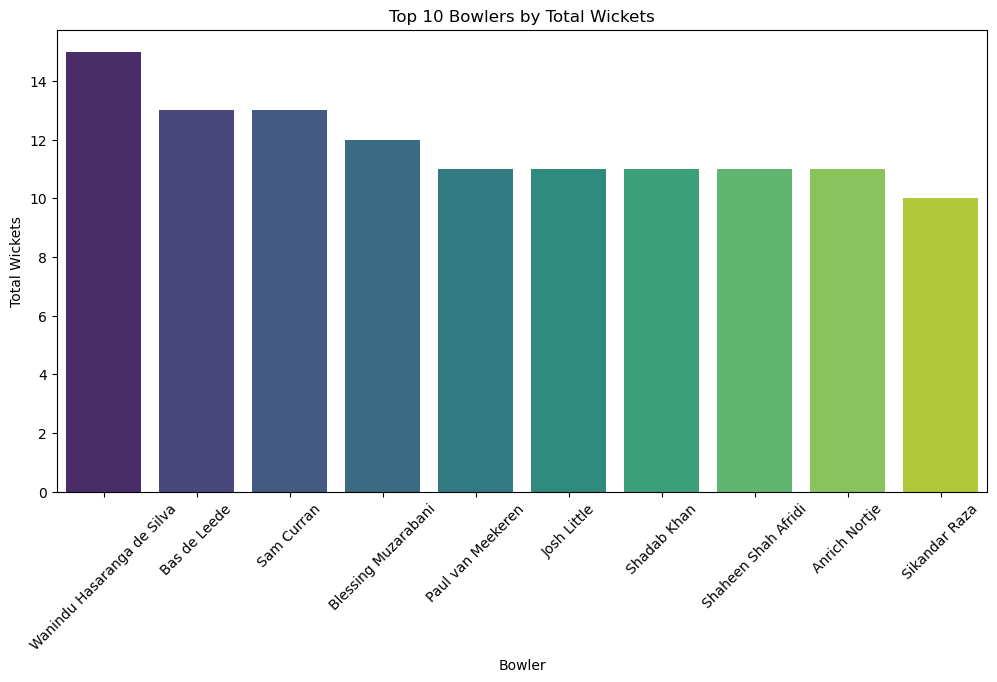

In [32]:
top_bowlers = bowling.groupby('bowlerName')['wickets'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="viridis")
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

##### So we can see that Wanindu Hasaranga de Silva is the bowler with the highest wickets

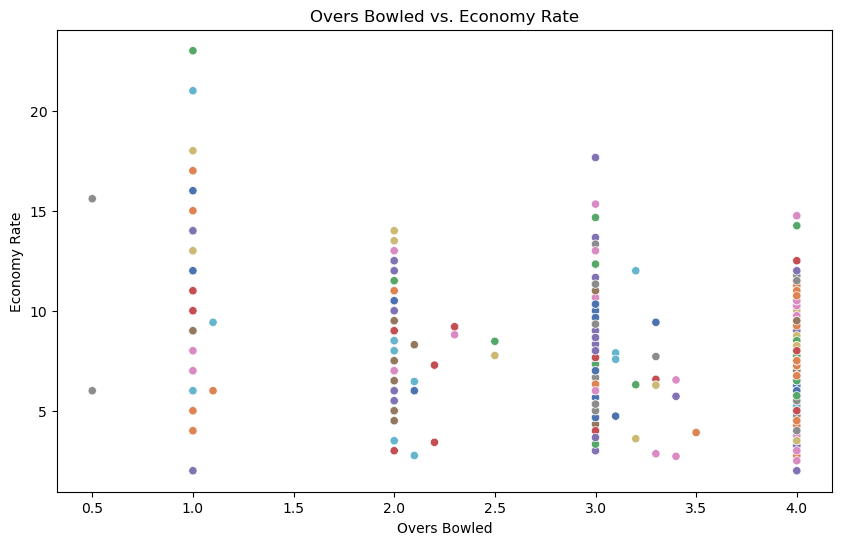

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowling, x='overs', y='economy', hue='bowlerName', palette="deep")
plt.title('Overs Bowled vs. Economy Rate')
plt.xlabel('Overs Bowled')
plt.ylabel('Economy Rate')
plt.legend([],[], frameon=False)
plt.show()

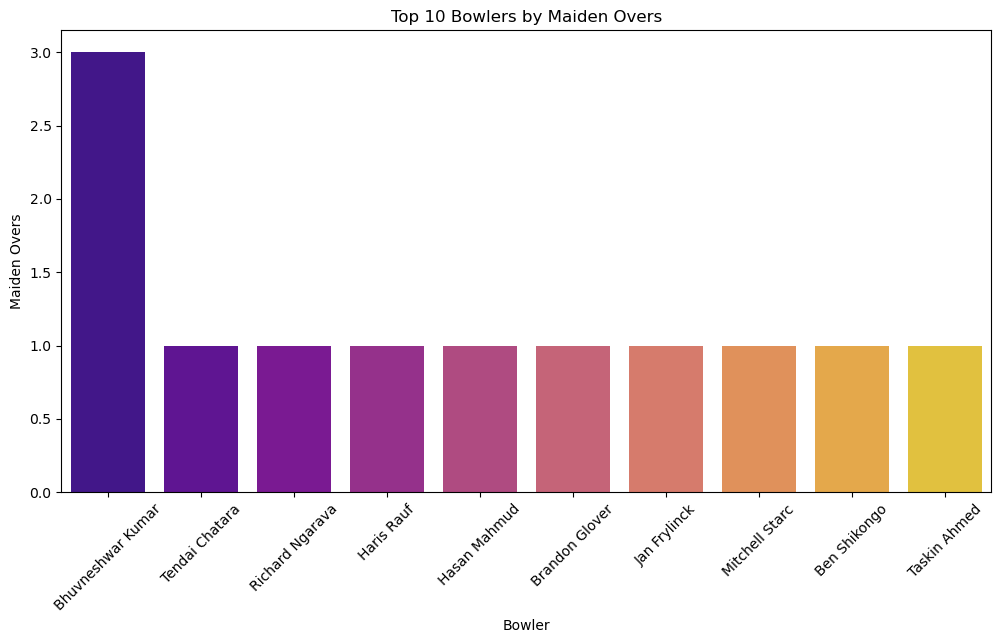

In [39]:
maiden_overs = bowling.groupby('bowlerName')['maiden'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=maiden_overs.index, y=maiden_overs.values, palette="plasma")
plt.title('Top 10 Bowlers by Maiden Overs')
plt.xlabel('Bowler')
plt.ylabel('Maiden Overs')
plt.xticks(rotation=45)
plt.show()

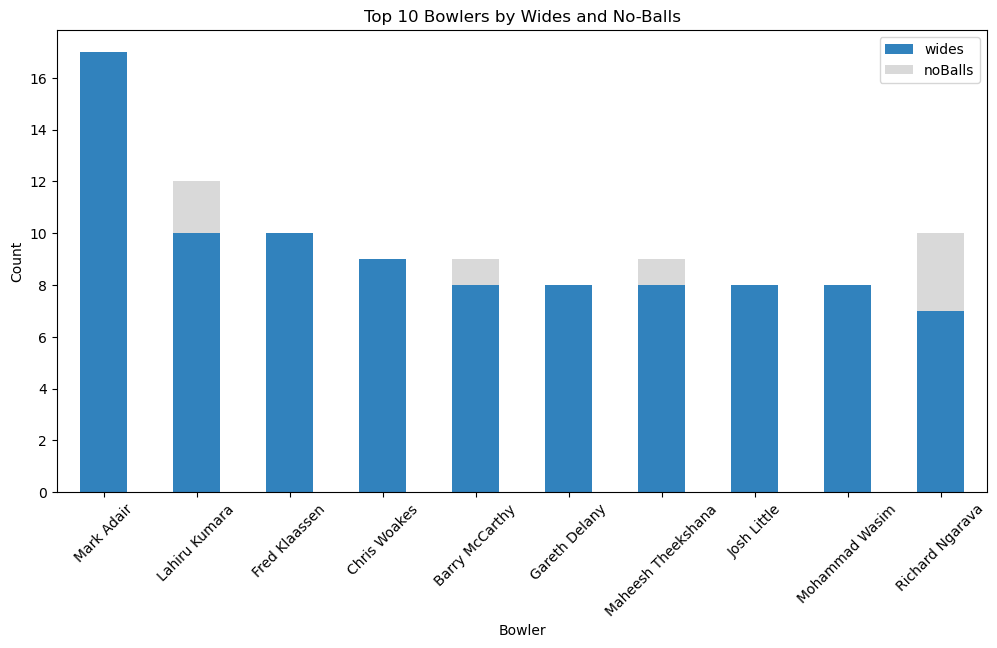

In [43]:
top_extras = bowling.groupby('bowlerName')[['wides', 'noBalls']].sum().sort_values(by='wides', ascending=False).head(10)
top_extras.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='tab20c')
plt.title('Top 10 Bowlers by Wides and No-Balls')
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Batting Summary

In [9]:
bating


,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,10,9,2,0,111.11,out,T20I # 1879
695,Pakistan Vs England,England,4,Ben Stokes,52,49,5,1,106.12,not_out,T20I # 1879
696,Pakistan Vs England,England,5,Harry Brook,20,23,1,0,86.95,out,T20I # 1879
697,Pakistan Vs England,England,6,Moeen Ali,19,13,3,0,146.15,out,T20I # 1879


In [16]:
bating.shape

(699, 11)

In [14]:
bating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   out/not_out  699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB


In [15]:
bating.isnull().sum()

match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64

In [16]:
bating.duplicated().sum()

0

In [17]:
#finding out the correlation
# Select only the numeric columns
numeric_bating = bating.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_bat = numeric_bating.corr()
print(corr_bat)


            battingPos      runs     balls        4s        6s
battingPos    1.000000 -0.365812 -0.424544 -0.361061 -0.219799
runs         -0.365812  1.000000  0.934207  0.866260  0.746293
balls        -0.424544  0.934207  1.000000  0.782134  0.583635
4s           -0.361061  0.866260  0.782134  1.000000  0.491318
6s           -0.219799  0.746293  0.583635  0.491318  1.000000


## Top 10 Batsmen

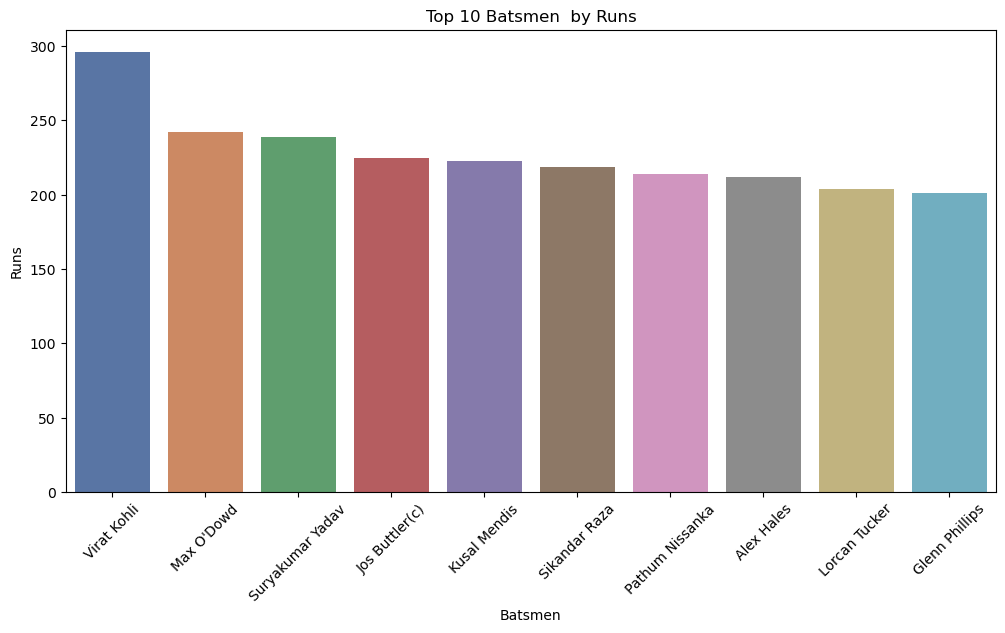

In [36]:
top_batsmen = bating.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="deep")
plt.title('Top 10 Batsmen  by Runs')
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

##### As we can see that the top batsman are Virat Kohli with runs of almost 300 whereas there are other players who has scored very well

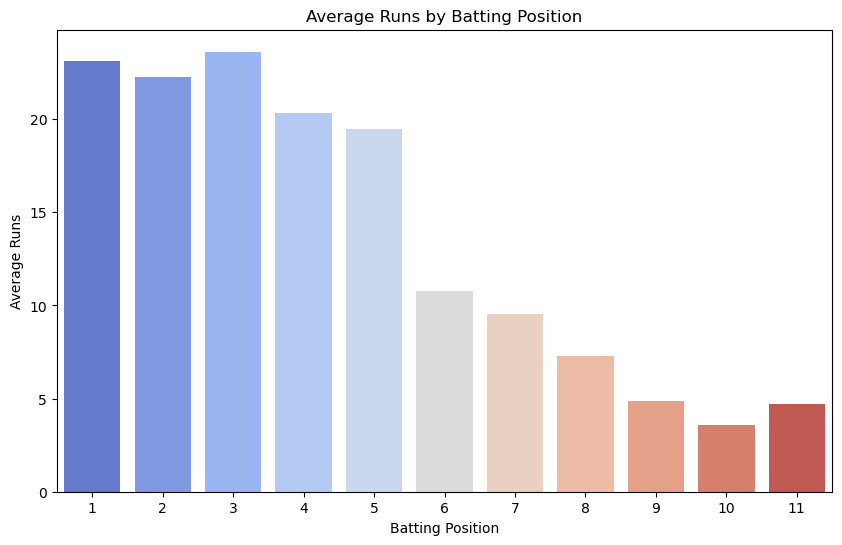

In [47]:
# Average Runs by Batting Position
avg_runs_by_pos = bating.groupby('battingPos')['runs'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_runs_by_pos.index, y=avg_runs_by_pos.values, palette="coolwarm")
plt.title('Average Runs by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Average Runs')
plt.show()

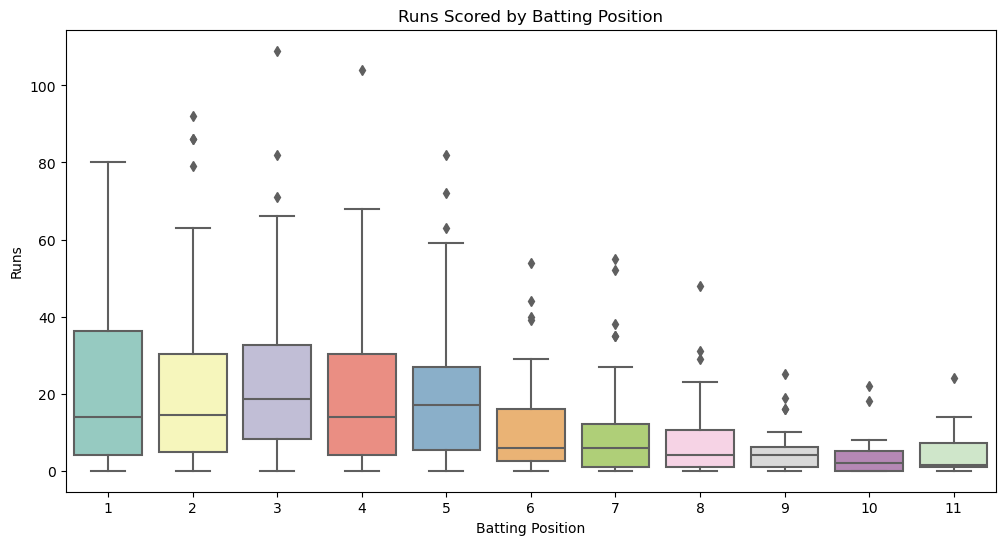

In [49]:
# Performance Comparison: Box plot comparing runs scored from different batting positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='battingPos', y='runs', data=bating, palette="Set3")
plt.title('Runs Scored by Batting Position')
plt.xlabel('Batting Position')
plt.ylabel('Runs')
plt.show()



C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


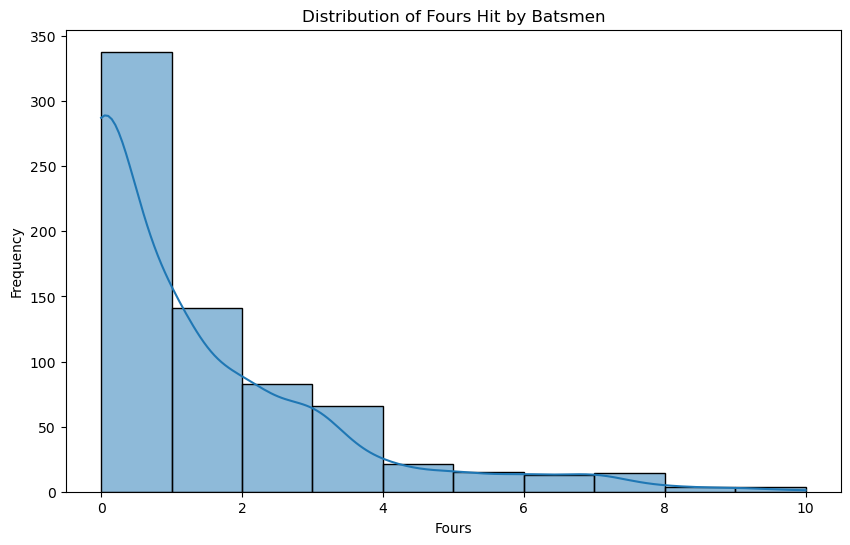

C:\Users\deept\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


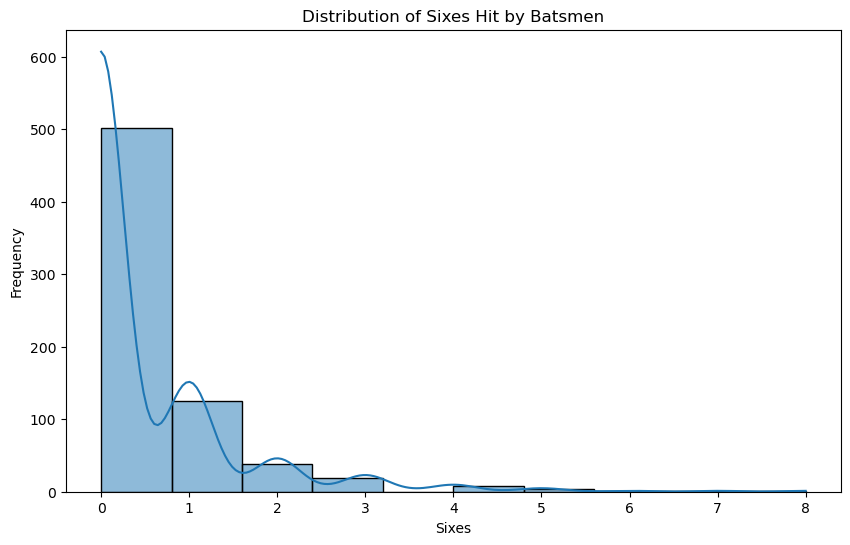

In [51]:
# Boundary Analysis

# 4s Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bating['4s'], bins=10, kde=True)
plt.title('Distribution of Fours Hit by Batsmen')
plt.xlabel('Fours')
plt.ylabel('Frequency')
plt.show()

# 6s Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bating['6s'], bins=10, kde=True)
plt.title('Distribution of Sixes Hit by Batsmen')
plt.xlabel('Sixes')
plt.ylabel('Frequency')
plt.show()


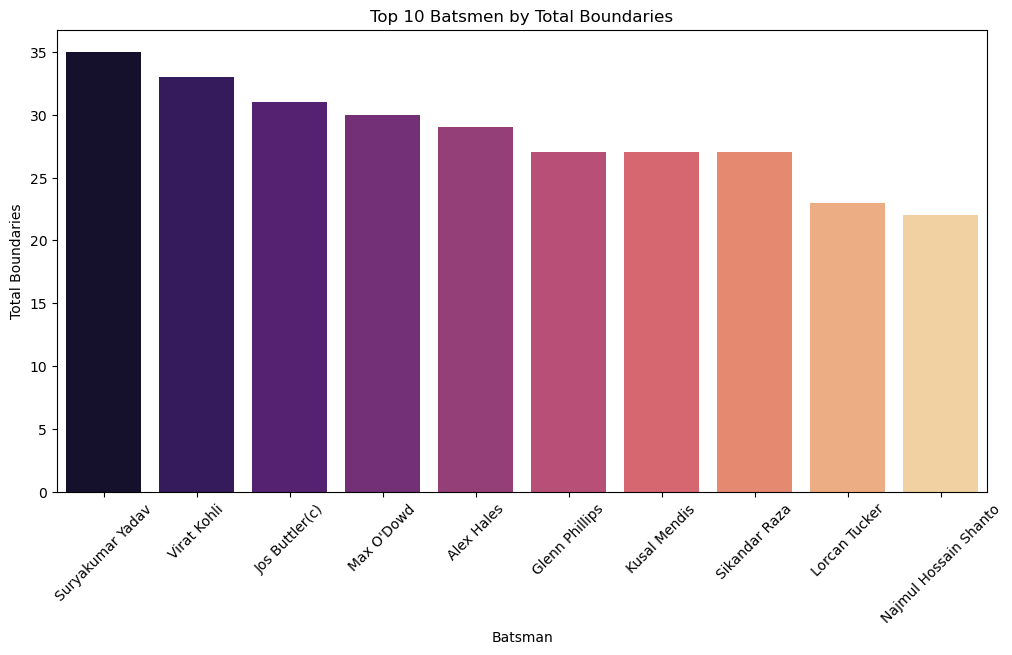

In [54]:
# Top Batsmen by Boundaries (4s + 6s)
bating['total_boundaries'] = bating['4s'] + bating['6s']
top_boundary_hitters = bating.groupby('batsmanName')['total_boundaries'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_boundary_hitters.index, y=top_boundary_hitters.values, palette="magma")
plt.title('Top 10 Batsmen by Total Boundaries')
plt.xlabel('Batsman')
plt.ylabel('Total Boundaries')
plt.xticks(rotation=45)
plt.show()

## Match Summary

In [17]:
match


,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830
5,Sri Lanka,U.A.E.,Sri Lanka,79 runs,Geelong,"Oct 18, 2022",T20I # 1832
6,Ireland,Scotland,Ireland,6 wickets,Hobart,"Oct 19, 2022",T20I # 1833
7,West Indies,Zimbabwe,West Indies,31 runs,Hobart,"Oct 19, 2022",T20I # 1834
8,Netherlands,Sri Lanka,Sri Lanka,16 runs,Geelong,"Oct 20, 2022",T20I # 1835
9,Namibia,U.A.E.,U.A.E.,7 runs,Geelong,"Oct 20, 2022",T20I # 1836


In [22]:
match.shape

(45, 7)

In [28]:
match = pd.read_csv("dim_match_summary.csv",parse_dates = ["matchDate"]).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   team1      45 non-null     object        
 1   team2      45 non-null     object        
 2   winner     45 non-null     object        
 3   margin     41 non-null     object        
 4   ground     45 non-null     object        
 5   matchDate  45 non-null     datetime64[ns]
 6   match_id   45 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.6+ KB


In [18]:
match.isnull().sum()

team1        0
team2        0
winner       0
margin       4
ground       0
matchDate    0
match_id     0
dtype: int64

In [19]:
match.duplicated().sum()

0

## Players Summary

In [20]:
players

,name,team,image,battingStyle,bowlingStyle,playingRole,description
0,Najmul Hossain Shanto,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Top order Batter,Nazmul Hossain Shanto emerged from an unusual ...
1,Soumya Sarkar,Bangladesh,NaN,Left hand Bat,Right arm Medium fast,Middle order Batter,"A rarity among Bangladesh allrounders, top-ord..."
2,Litton Das,Bangladesh,NaN,Right hand Bat,NaN,Wicketkeeper Batter,Liton Das is the first wicketkeeper-batsman in...
3,Shakib Al Hasan(c),Bangladesh,NaN,Left hand Bat,Slow Left arm Orthodox,Allrounder,When the annals of Bangladesh cricket are sift...
4,Afif Hossain,Bangladesh,NaN,Left hand Bat,Right arm Offbreak,Allrounder,Bangladesh left-hander Afif Hossain made his T...
...,...,...,...,...,...,...,...
214,Shoriful Islam,Bangladesh,NaN,Left hand Bat,Left arm Medium fast,Bowler,"At 6ft three inches, Shoriful Islam became a l..."
215,Phil Salt,England,NaN,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Phil Salt's fearless ball-striking at the top ...
216,Ashton Agar,Australia,NaN,Left hand Bat,Slow Left arm Orthodox,Bowler,Ashton Agar initially turned almost as many he...
217,Heinrich Klaasen,South Africa,NaN,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,"A clean-hitting, wicketkeeper batsman, Heinric..."


In [9]:
players.shape

(219, 7)

In [27]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          219 non-null    object
 1   team          219 non-null    object
 2   image         31 non-null     object
 3   battingStyle  219 non-null    object
 4   bowlingStyle  199 non-null    object
 5   playingRole   219 non-null    object
 6   description   149 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [55]:
players.duplicated().sum()

0

In [21]:
players.isnull().sum()

name              0
team              0
image           188
battingStyle      0
bowlingStyle     20
playingRole       0
description      70
dtype: int64

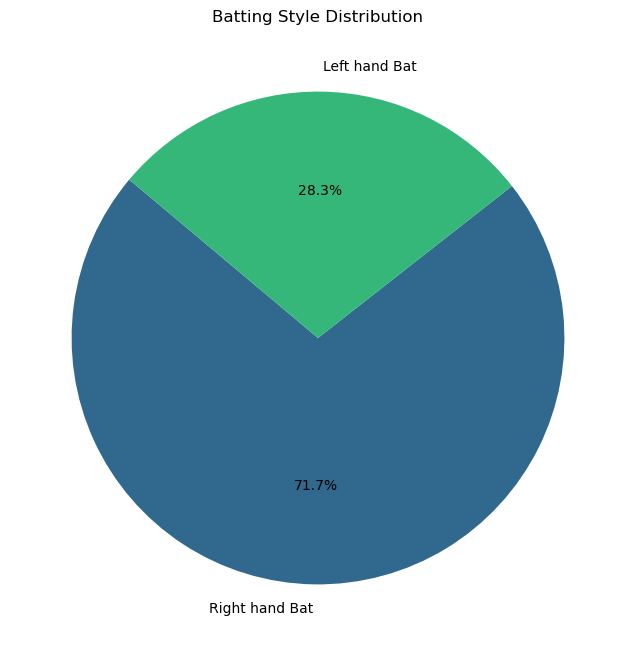

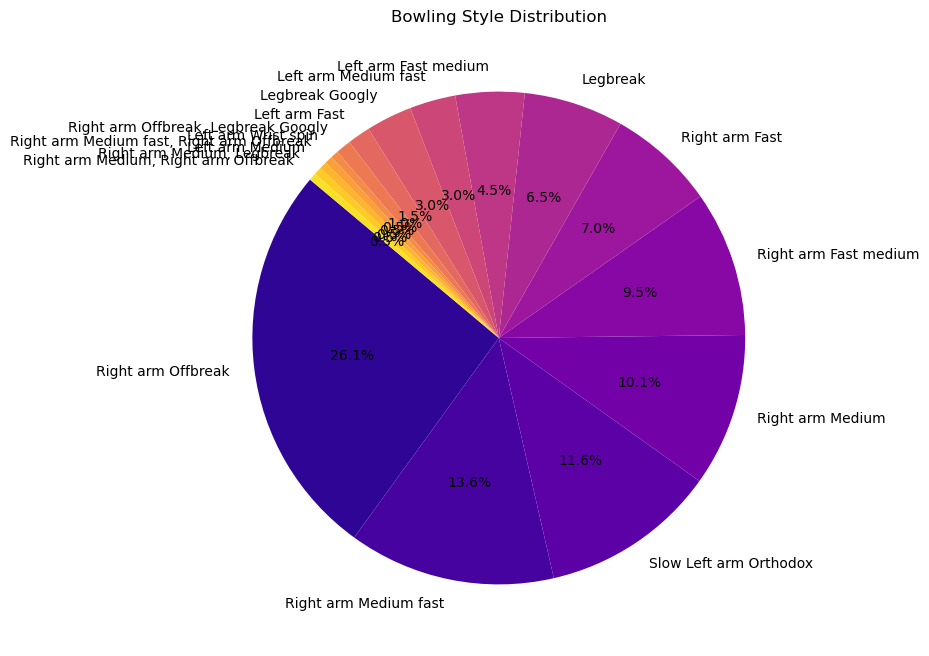

In [67]:
# Batting Style Distribution
batting_style_distribution = players['battingStyle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(batting_style_distribution, labels=batting_style_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(batting_style_distribution)))
plt.title('Batting Style Distribution')
plt.show()

# Bowling Style Distribution
bowling_style_distribution = players['bowlingStyle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bowling_style_distribution, labels=bowling_style_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', len(bowling_style_distribution)))
plt.title('Bowling Style Distribution')
plt.show()

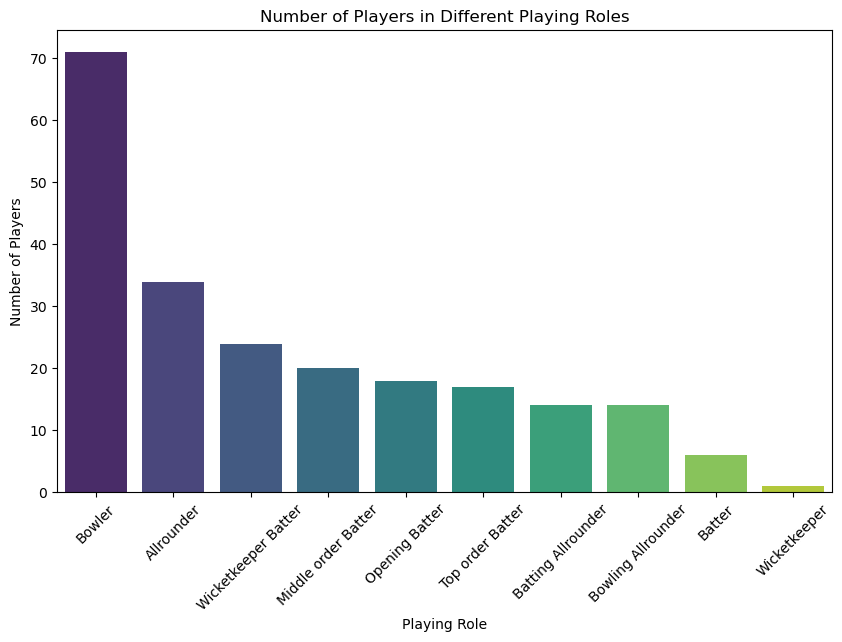

In [69]:
# Playing Roles Distribution
playing_role_distribution = players['playingRole'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=playing_role_distribution.index, y=playing_role_distribution.values, palette='viridis')
plt.title('Number of Players in Different Playing Roles')
plt.xlabel('Playing Role')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Display detailed profile of top players (example for the top 5 players)
top_players = players.head(5)  # Replace with actual logic for selecting top players

for _, player in top_players.iterrows():
    print(f"Name: {player['name']}")
    print(f"Team: {player['team']}")
    print(f"Batting Style: {player['battingStyle']}")
    print(f"Bowling Style: {player['bowlingStyle']}")
    print(f"Playing Role: {player['playingRole']}")
    print(f"Description: {player['description']}\n")


Name: Najmul Hossain Shanto
Team: Bangladesh
Batting Style: Left hand Bat
Bowling Style: Right arm Offbreak
Playing Role: Top order Batter
Description: Nazmul Hossain Shanto emerged from an unusual source in Bangladesh cricket - the schools. A double-century in a school one-day match in Rajshahi grabbed the attention of age-group scouts, who quickly drafted the left-hander into Bangladesh's Under-17s. Soon, he graduated to the Under-19s in 2013, and went on to play two World Cups at that level, in 2014 and 2016.

Name: Soumya Sarkar
Team: Bangladesh
Batting Style: Left hand Bat
Bowling Style: Right arm Medium fast
Playing Role: Middle order Batter
Description: A rarity among Bangladesh allrounders, top-order batter Soumya Sarkar bowls medium pace rather than spin, and occasionally even takes the new ball. 

Name: Litton Das
Team: Bangladesh
Batting Style: Right hand Bat
Bowling Style: nan
Playing Role: Wicketkeeper Batter
Description: Liton Das is the first wicketkeeper-batsman in Bang

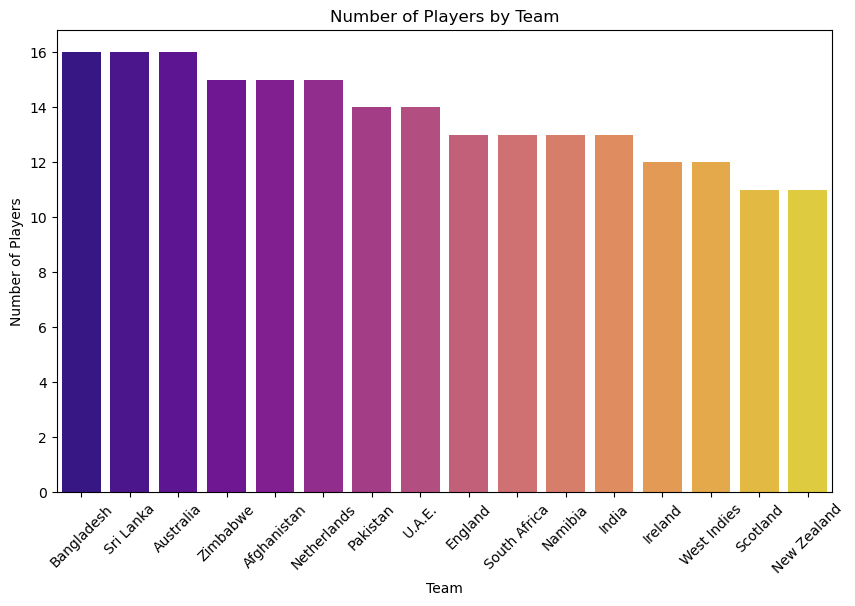

In [71]:
# Players by Team
players_by_team = players['team'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=players_by_team.index, y=players_by_team.values, palette='plasma')
plt.title('Number of Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


In [80]:
df.sample(10)

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
17,Optus Stadium,India,South Africa,Super 12,India,Bat,133.0,9.0,137.0,5.0,South Africa,Wickets,Lungi Ngidi,Suryakumar Yadav,68.0,Lungi Ngidi,4-29
29,MCG,India,Zimbabwe,Super 12,India,Bat,186.0,5.0,115.0,10.0,India,Runs,Suryakumar Yadav,Suryakumar Yadav,61.0,Ravichandran Ashwin,3-22
21,Adelaide Oval,Zimbabwe,Netherlands,Super 12,Zimbabwe,Bat,117.0,10.0,120.0,5.0,Netherlands,Wickets,Max O'Dowd,Max O'Dowd,52.0,Paul van Meekeren,3-29
18,The Gabba,Australia,Ireland,Super 12,Ireland,Field,179.0,5.0,137.0,10.0,Australia,Runs,Aaron Finch,Lorcan Tucker,71.0,Barry McCarthy,3-29
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25
13,MCG,Australia,England,Super 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Optus Stadium,Zimbabwe,Pakistan,Super 12,Zimbabwe,Bat,130.0,8.0,129.0,8.0,Zimbabwe,Runs,Sikandar Raza,Shan Masood,44.0,Mohammad Wasim,4-24
31,Adelaide Oval,India,England,Semi-final,England,Field,168.0,6.0,170.0,0.0,England,Wickets,Alex Hales,Alex Hales,86.0,Chris Jordan,3-43
6,Optus Stadium,Sri lanka,Australia,Super 12,Australia,Field,157.0,6.0,158.0,3.0,Australia,Wickets,Marcus Stoinis,Marcus Stoinis,59.0,Glenn Maxwell,1-5
20,The Gabba,England,New Zealand,Super 12,England,Bat,179.0,6.0,159.0,6.0,England,Runs,Jos Buttler,Jos Buttler,73.0,Sam Curran,2-26


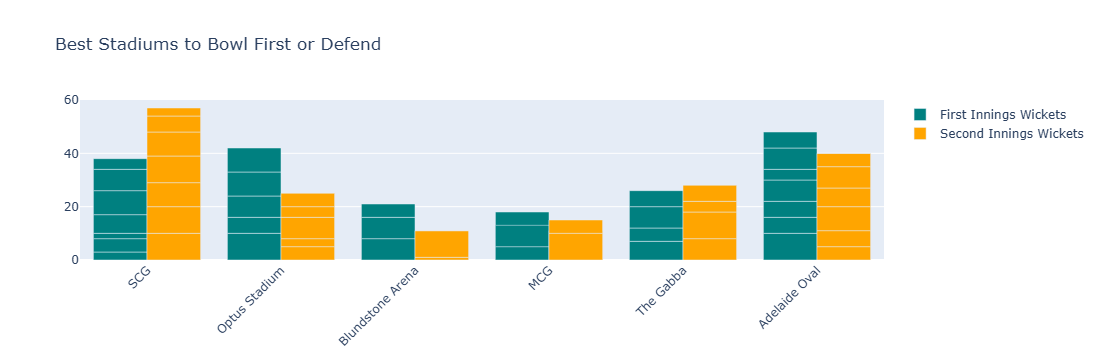

In [85]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df["venue"],
    y=df["first innings wickets"],
    name='First Innings Wickets',
    marker_color='teal'  # Changed color
))

fig.add_trace(go.Bar(
    x=df["venue"],
    y=df["second innings wickets"],
    name='Second Innings Wickets',
    marker_color='orange'  # Changed color
))

fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Stadiums to Bowl First or Defend")
fig.show()


### SCG was the best stadium to bowl while defending the target. While the Optus Stadium was the best stadium to bowl first.

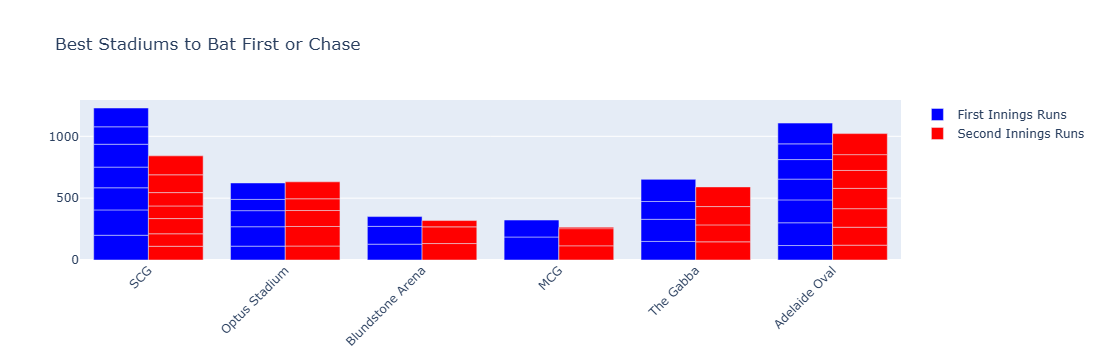

In [86]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df["venue"],
    y=df["first innings score"],
    name='First Innings Runs',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=df["venue"],
    y=df["second innings score"],
    name='Second Innings Runs',
    marker_color='red'
))
fig.update_layout(barmode='group', 
                  xaxis_tickangle=-45, 
                  title="Best Stadiums to Bat First or Chase")
fig.show()

### So SCG was the only stadium in the world cup that was best for batting first. Other stadiums didn’t make much difference while batting first or chasing.

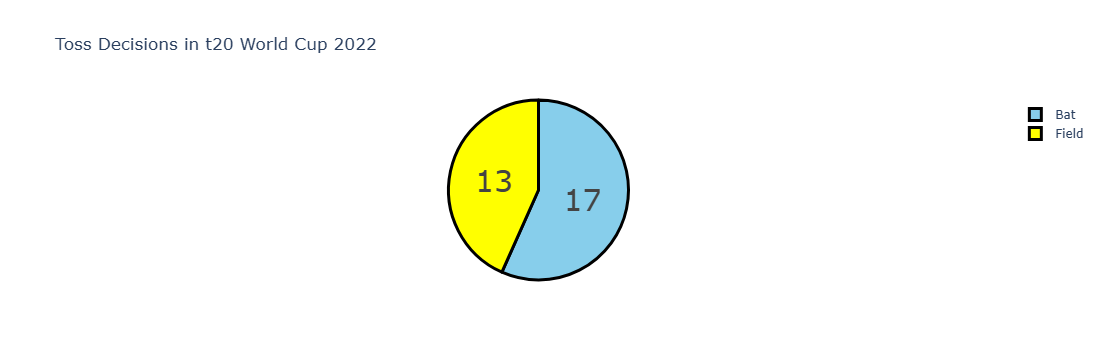

In [87]:
toss = df["toss decision"].value_counts()
label = toss.index
counts = toss.values
colors = ['skyblue','yellow']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Toss Decisions in t20 World Cup 2022')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### So in 17 matches, the teams decided to bat first, and in 13 matches, the teams chose to field first.